# Quality Control on in-silico spatial proteomics with Harpy

## Introduction

This noteboook outlines some quality controls steps for highly-multiplexed spatial proteomics data using the Harpy package. Most steps are similar to [this good resource on Imaging Mass Cytometry data analysis in R](https://bodenmillergroup.github.io/IMCDataAnalysis/image-and-cell-level-quality-control.html#image-and-cell-level-quality-control) from the Bodenmiller lab. Here, an artificial in-silico dataset is used to demonstrate the quality control steps.

The levels of quality control are:

- **Image level**: to give an overview of the quality of the images in the dataset.
- **Segmentation level**: to give an overview of the quality of the segmentation in the dataset.
- **Cell level**: to give an overview of the quality of the calculated features per cell in the dataset.

We start by loading in an example dataset and visualising the data:


In [317]:
%load_ext autoreload
%autoreload 2

import sparrow as sp
import spatialdata_plot
import spatialdata as sd
import matplotlib.pyplot as plt
import scanpy as sc
from sparrow.datasets import multisample_blobs

plt.viridis()

sdata = multisample_blobs(n_samples=4)
sdata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_0_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_1_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_2_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     no axes information specified in the object, setting `dims` to: ('c', 'y', 'x')                           
INFO     no axes information specified in the object, setting `dims` to: ('y', 'x')                                


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `sample_3_table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


SpatialData object
├── Images
│     ├── 'sample_0_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_1_image': DataArray[cyx] (11, 512, 512)
│     ├── 'sample_2_image': DataArray[cyx] (11, 512, 512)
│     └── 'sample_3_image': DataArray[cyx] (11, 512, 512)
├── Labels
│     ├── 'sample_0_labels': DataArray[yx] (512, 512)
│     ├── 'sample_1_labels': DataArray[yx] (512, 512)
│     ├── 'sample_2_labels': DataArray[yx] (512, 512)
│     └── 'sample_3_labels': DataArray[yx] (512, 512)
├── Points
│     ├── 'sample_0_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_1_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     ├── 'sample_2_points': DataFrame with shape: (<Delayed>, 2) (2D points)
│     └── 'sample_3_points': DataFrame with shape: (<Delayed>, 2) (2D points)
└── Tables
      ├── 'sample_0_table': AnnData (20, 11)
      ├── 'sample_1_table': AnnData (20, 11)
      ├── 'sample_2_table': AnnData (20, 11)
      ├── 'sample_3_table': AnnData (20, 1

<Figure size 640x480 with 0 Axes>

In [318]:
table = sdata["table"]

In [319]:
table.to_df()

nucleus      lineage_0      lineage_1      lineage_2  \
cells                                                               
1      130579.074583   73143.384718   90176.329291   78887.342227   
2       97747.257070   44127.352051   54403.315415   47592.677537   
3      129783.693347   72871.920340   89159.713324   77997.994298   
4      126967.536598   69764.494608   86010.594981  159287.142678   
5      107214.353348   52460.254002   64676.705321   56579.963133   
...              ...            ...            ...            ...   
16     161696.495625   84635.637309  175638.724282  105850.500384   
17     163295.271990   86338.942986   93873.258186  107784.066049   
18     153201.459416   75869.389265   82490.085245   94714.053483   
19     154421.629069  153238.714827   83799.306745   96217.284748   
20     161275.579840   84186.643485  175348.640010  105097.641133   

           lineage_3     lineage_4      lineage_5      lineage_6  \
cells                                                              
1       83547.398858      0.000000   85104.954042   89203.618952   
2       50404.086393      0.000000   51343.758329  103611.315408   
3       82605.515103      0.000000  132335.765591   88197.968976   
4       79687.890840      0.000000   81180.370216   85082.819414   
5      124573.992918      0.000000   61039.388909   63979.053282   
...              ...           ...            ...            ...   
16     102504.128585  88371.831230  106509.552476   97690.881838   
17     104567.040494  90150.328405  108653.074179  188483.571632   
18      91887.127930  80816.560758   95477.684746   87572.419579   
19      93345.492327  80475.900902   96993.035800   88962.304123   
20     101960.342041  87903.016819  105944.517075   97172.629669   

           lineage_7      lineage_8     lineage_9  
cells                                              
1       71052.452962  166453.784109  79783.723973  
2       42865.894408   48557.293269  48133.464008  
3       70251.432797   79581.243727  78884.270554  
4       67770.154343   76768.146443  76776.118424  
5       50960.585762   57726.734557  57222.870407  
...              ...            ...           ...  
16      97966.012854   96128.415489      0.000000  
17      99937.594462   98063.015157      0.000000  
18     175560.397181   86171.787748      0.000000  
19      89212.852472   88883.535945      0.000000  
20      97446.301109   95618.452236      0.000000  

[80 rows x 11 columns]

In [320]:
table.var

cycle
nucleus        0
lineage_0      0
lineage_1      1
lineage_2      1
lineage_3      2
lineage_4      2
lineage_5      3
lineage_6      3
lineage_7      4
lineage_8      4
lineage_9      5

In [321]:
table.obs

instance_id region       fov_labels  cell_ID phenotype    area  \
cells                                                                   
1                1     by  sample_0_labels        1         8  2393.0   
2                2     by  sample_0_labels        2         6  1489.0   
3                3     by  sample_0_labels        3         5  2332.0   
4                4     by  sample_0_labels        4         2  2352.0   
5                5     by  sample_0_labels        5         3  1706.0   
...            ...    ...              ...      ...       ...     ...   
16              16     by  sample_3_labels       16         1  2856.0   
17              17     by  sample_3_labels       17         6  2885.0   
18              18     by  sample_3_labels       18         7  2616.0   
19              19     by  sample_3_labels       19         0  2665.0   
20              20     by  sample_3_labels       20         1  2844.0   

       eccentricity  major_axis_length  minor_axis_length   perimeter  \
cells                                                                   
1          0.000000          55.199096          55.199096  180.852814   
2          0.840912          60.858245          32.934784  160.083261   
3          0.296286          55.821777          53.315330  179.338095   
4          0.249266          55.649195          53.892628  180.852814   
5          0.765745          59.549068          38.298639  166.083261   
...             ...                ...                ...         ...   
16         0.198505          60.937241          59.724580  198.409163   
17         0.000000          60.607577          60.607577  197.823376   
18         0.508391          62.616366          53.920614  194.793939   
19         0.466229          62.247488          55.068120  193.036580   
20         0.237913          61.101562          59.347125  196.509668   

       centroid-0  centroid-1  convex_area  equivalent_diameter  \
cells                                                             
1      482.000000  410.000000       2433.0            55.198390   
2      161.000000   12.721961       1519.0            43.541402   
3      369.522298  388.423671       2375.0            54.490317   
4       64.180697  106.579082       2397.0            54.723481   
5      216.000000  495.966002       1734.0            46.606294   
...           ...         ...          ...                  ...   
16     328.041317  117.297969       2911.0            60.302339   
17     245.000000  470.000000       2933.0            60.607723   
18     110.995413  406.372706       2680.0            57.713037   
19     227.496060  153.503940       2703.0            58.251038   
20      27.427215  169.000000       2890.0            60.175520   

       _major_minor_axis_ratio  _perim_square_over_area  \
cells                                                     
1                     1.000000                13.668090   
2                     1.847841                17.210645   
3                     1.047012                13.791661   
4                     1.032594                13.906352   
5                     1.554861                16.168611   
...                        ...                      ...   
16                    1.020304                13.783682   
17                    1.000000                13.564675   
18                    1.161270                14.504847   
19                    1.130372                13.982409   
20                    1.029562                13.578077   

       _major_axis_equiv_diam_ratio  _convex_hull_resid  _centroid_dif  
cells                                                                   
1                          1.000013            0.016441       0.000000  
2                          1.397710            0.019750       0.003520  
3                          1.024435            0.018105       0.001060  
4                          1.016916            0.018773       0.001168  
5                          1.

In [322]:
selected_markers = table.var_names[:3].tolist()
selected_markers

['nucleus', 'lineage_0', 'lineage_1']

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_1_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_2_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData obje

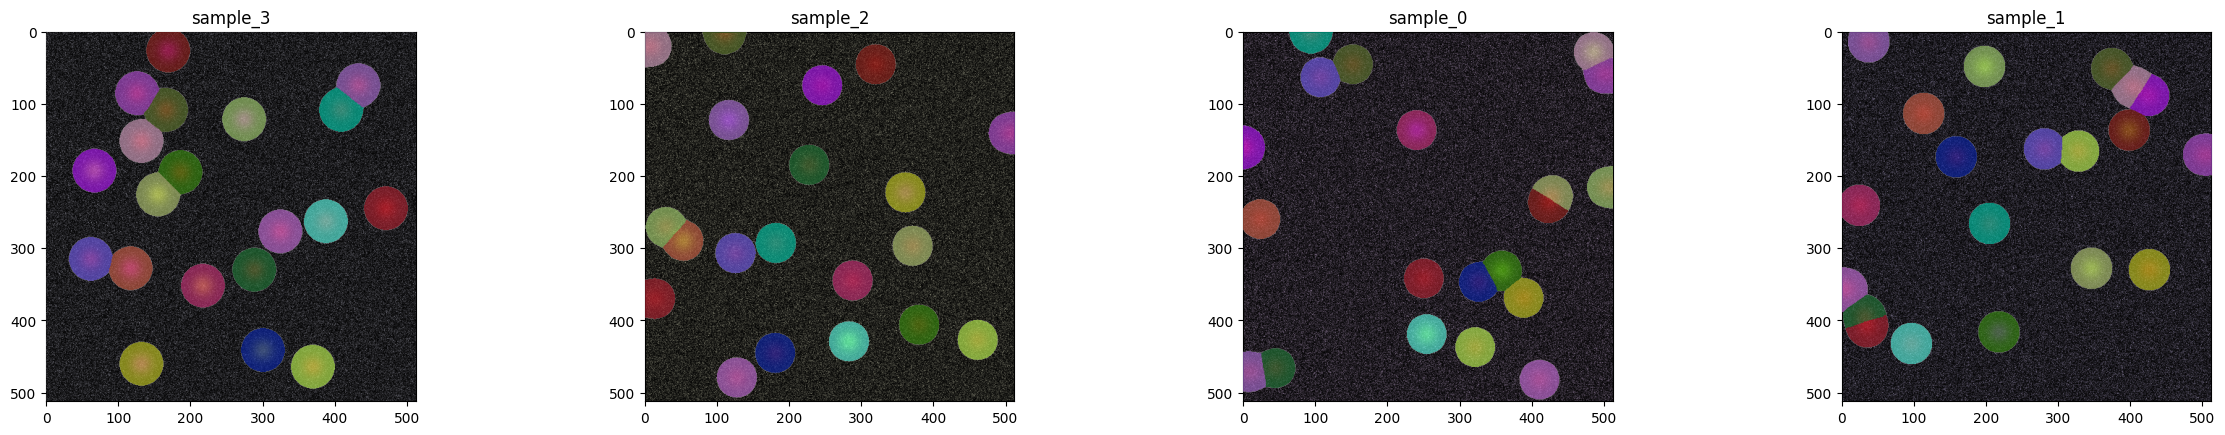

In [323]:
sdata.pl.render_images(channel=selected_markers).pl.render_labels().pl.show()

## Image level quality control


In [324]:
table.var["cycle"]

nucleus      0
lineage_0    0
lineage_1    1
lineage_2    1
lineage_3    2
lineage_4    2
lineage_5    3
lineage_6    3
lineage_7    4
lineage_8    4
lineage_9    5
Name: cycle, dtype: int64

In [325]:
df = sp.pl.calculate_snr_ratio(sdata, cycles="cycle")
df

2024-09-27 14:45:27.308 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


image  cycle    channel       snr     signal
0   sample_0_image      0    nucleus  3.287837  73.395618
1   sample_0_image      0  lineage_0  3.350054  60.223873
2   sample_0_image      1  lineage_1  3.341242  71.868568
3   sample_0_image      1  lineage_2  3.339835  62.863215
4   sample_0_image      2  lineage_3  3.341236  66.354626
5   sample_0_image      2  lineage_4       NaN        NaN
6   sample_0_image      3  lineage_5  3.328766  68.452983
7   sample_0_image      3  lineage_6  3.333190  71.719604
8   sample_0_image      4  lineage_7  3.341090  56.638927
9   sample_0_image      4  lineage_8  3.346352  65.247809
10  sample_0_image      5  lineage_9  3.351038  65.531110
11  sample_1_image      0    nucleus  3.317217  68.429706
12  sample_1_image      0  lineage_0  3.354614  57.989819
13  sample_1_image      1  lineage_1  3.347276  68.978197
14  sample_1_image      1  lineage_2  3.353919  63.870013
15  sample_1_image      2  lineage_3  3.345361  55.801995
16  sample_1_image      2  lineage_4  3.340518  72.187184
17  sample_1_image      3  lineage_5  3.348367  66.388941
18  sample_1_image      3  lineage_6  3.345955  63.479419
19  sample_1_image      4  lineage_7  3.345319  63.756732
20  sample_1_image      4  lineage_8  3.354425  67.277019
21  sample_1_image      5  lineage_9  3.351014  68.710552
22  sample_2_image      0    nucleus  3.285106  72.556726
23  sample_2_image      0  lineage_0  3.346338  66.941166
24  sample_2_image      1  lineage_1  3.348429  58.152628
25  sample_2_image      1  lineage_2  3.354761  64.411135
26  sample_2_image      2  lineage_3  3.342676  62.753927
27  sample_2_image      2  lineage_4  3.343551  62.706414
28  sample_2_image      3  lineage_5  3.346515  65.341556
29  sample_2_image      3  lineage_6  3.346694  68.759239
30  sample_2_image      4  lineage_7  3.340821  65.563372
31  sample_2_image      4  lineage_8  3.342025  63.964066
32  sample_2_image      5  lineage_9  3.342700  61.233602
33  sample_3_image      0    nucleus  3.409306  74.062011
34  sample_3_image      0  lineage_0  3.354025  59.879868
35  sample_3_image      1  lineage_1  3.355139  65.147514
36  sample_3_image      1  lineage_2  3.346811  72.394797
37  sample_3_image      2  lineage_3  3.345158  69.136590
38  sample_3_image      2  lineage_4  3.347905  60.523140
39  sample_3_image      3  lineage_5  3.344262  71.837665
40  sample_3_image      3  lineage_6  3.349851  66.981595
41  sample_3_image      4  lineage_7  3.344799  66.048378
42  sample_3_image      4  lineage_8  3.351530  66.949340
43  sample_3_image      5  lineage_9       NaN        NaN

In [326]:
df = df.groupby(["image", "channel"]).mean(numeric_only=True)

2024-09-27 14:45:28.990 | DEBUG    | sparrow.plot._qc_image:snr_ratio:64 - Plotting SNR ratio
2024-09-27 14:45:29.002 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 14:45:30.524 | DEBUG    | sparrow.plot._qc_image:snr_ratio:83 -              cycle       snr     signal
channel                                
lineage_0  #46327e  3.351258  61.258682
lineage_1  #365c8d  3.348022  66.036727
lineage_2  #365c8d  3.348832  65.884790
lineage_3  #277f8e  3.343608  63.511785
lineage_4  #277f8e  3.343991  65.138913
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:5

<Axes: xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>

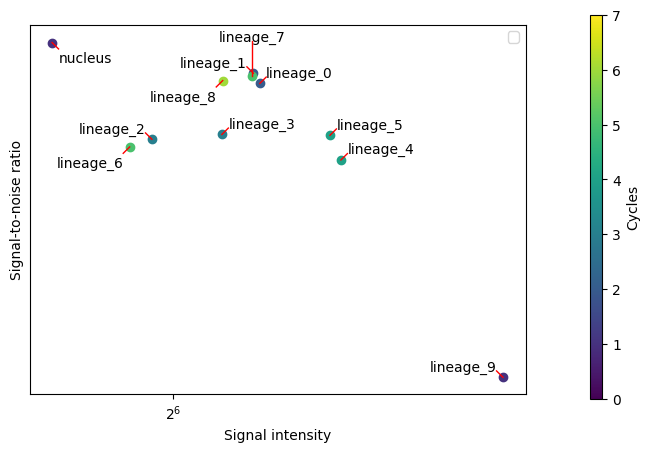

In [327]:
sp.pl.snr_ratio(sdata, color="cycle")

2024-09-27 14:45:30.735 | DEBUG    | sparrow.plot._qc_image:group_snr_ratio:124 - Plotting SNR ratio
2024-09-27 14:45:30.735 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 14:45:32.296 | DEBUG    | sparrow.plot._qc_image:group_snr_ratio:147 - sample_0_image
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:502: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p = ax.transD

array([[<Axes: title={'center': 'sample_0_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>,
        <Axes: title={'center': 'sample_1_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>],
       [<Axes: title={'center': 'sample_2_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>,
        <Axes: title={'center': 'sample_3_image'}, xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>]],
      dtype=object)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


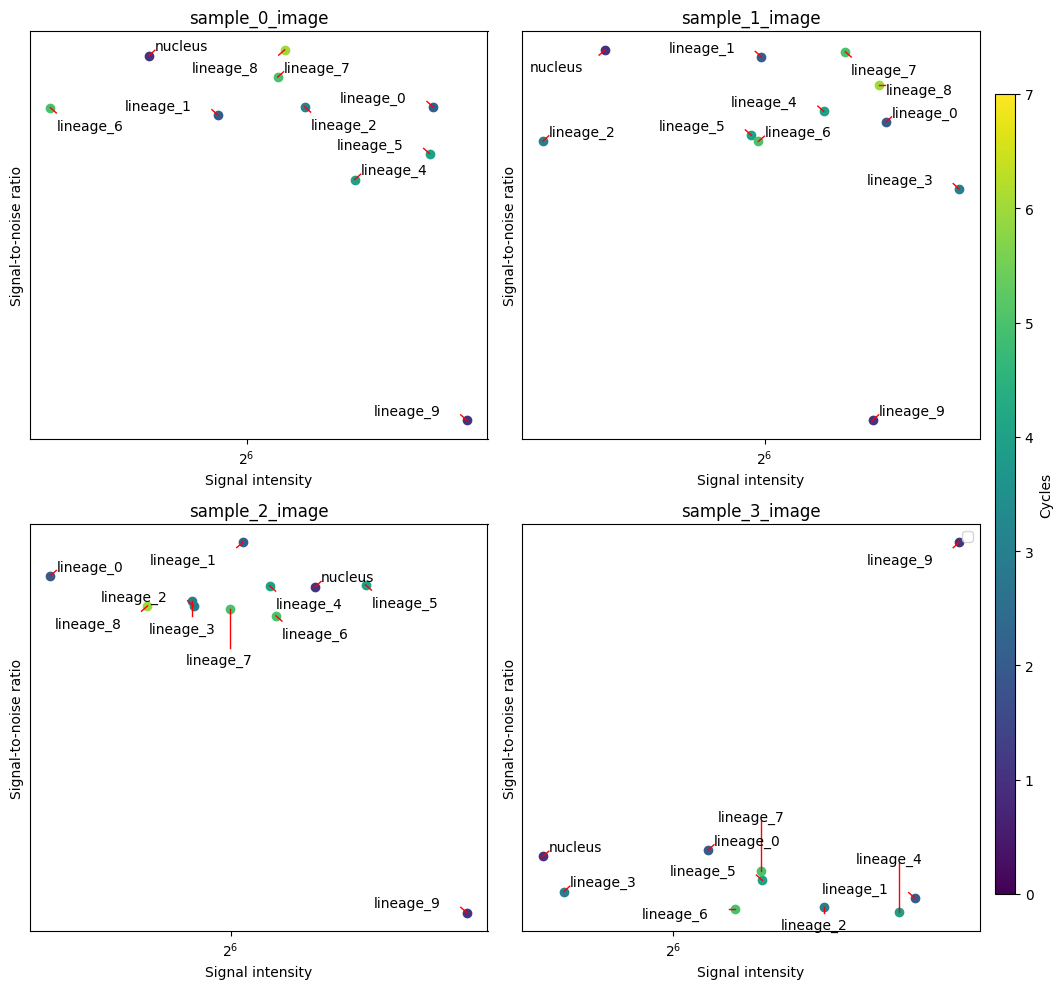

In [328]:
sp.pl.group_snr_ratio(sdata, groupby=["image", "channel"], color="cycle")

2024-09-27 14:45:33.121 | DEBUG    | sparrow.plot._qc_image:snr_ratio:64 - Plotting SNR ratio
2024-09-27 14:45:33.129 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
2024-09-27 14:45:34.501 | DEBUG    | sparrow.plot._qc_image:snr_ratio:83 -                 snr     signal
channel                       
lineage_0  3.351258  61.258682
lineage_1  3.348022  66.036727
lineage_2  3.348832  65.884790
lineage_3  3.343608  63.511785
lineage_4  3.343991  65.138913
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/textalloc/__init__.py:502: FutureWarning: Series.__getitem__ treating keys as position

<Axes: xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>

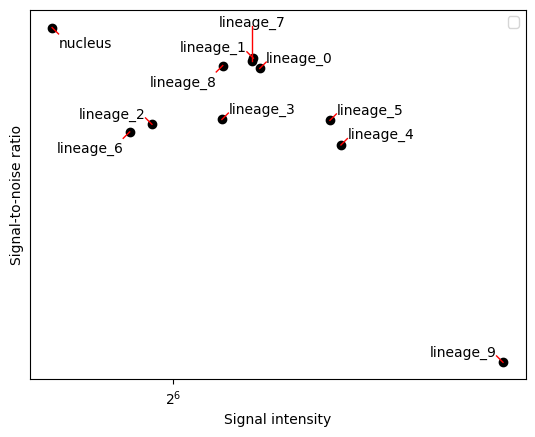

In [329]:
sp.pl.snr_ratio(sdata, signal_threshold=2)

The plots above summarize all samples together. It would be interesting to look without cell segmentation bias across all channels and samples. There are multiple ways to aggregate the channel signal on an image level to a heatmap. One way is to create heatmaps using the SNR and signal values calculated above. This again depends on the unsupervised Otsu thresholding and is not a very good proxy of a good cell segmentation.

When showing the heatmap you could use the z_score or standard_scale options, but it's also interesting not to transform the data too much in order to still visualize the outliers.


2024-09-27 14:45:34.685 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


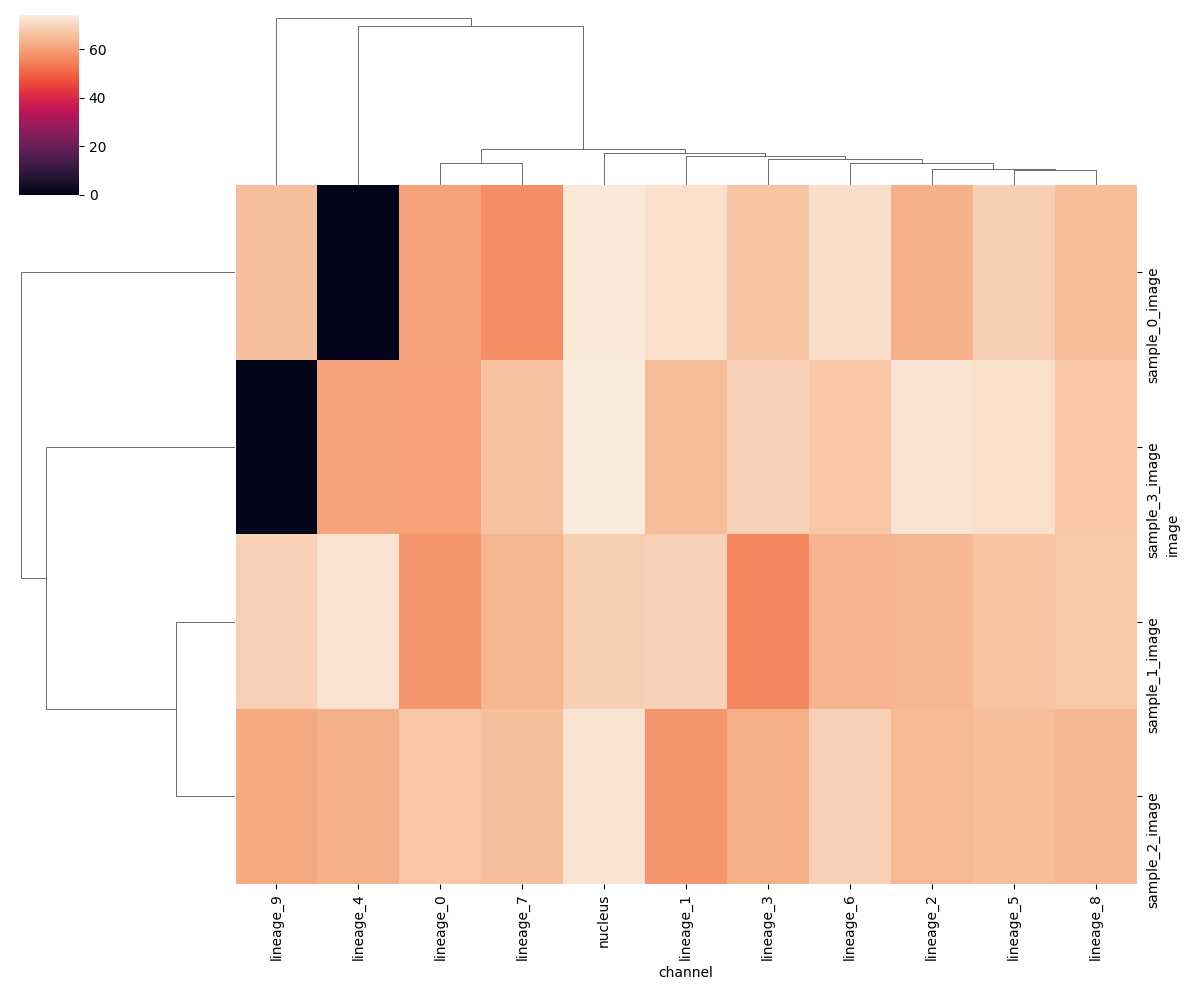

In [330]:
sp.pl.signal_clustermap(sdata, signal_threshold=2, figsize=(12, 10))

2024-09-27 14:45:36.509 | DEBUG    | sparrow.plot._qc_image:calculate_snr_ratio:37 - Calculating SNR ratio
/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_image.py:22: RuntimeWarning: Mean of empty slice.
  noise = img[~mask].mean()
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


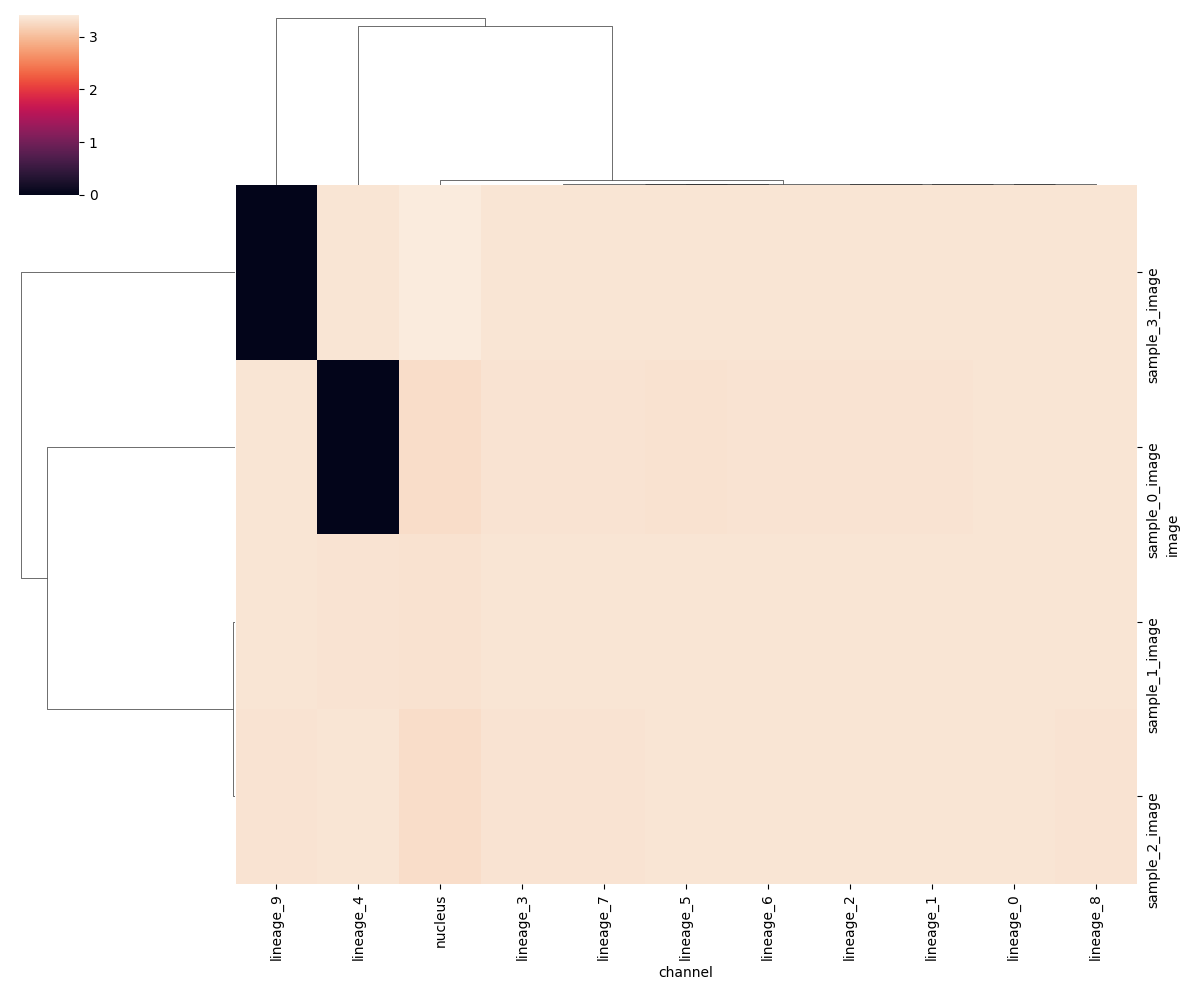

In [331]:
sp.pl.snr_clustermap(sdata, signal_threshold=2, figsize=(12, 10))

Another way is to normalize the image with a quartile normalization. The min and max quartile can greatly influence how the ends of the intensity distributions. Here we clip the signal below and above the 5th and 95th percentile. We also apply an arcsinh transformation to each channel against extreme outliers to make the heatmap more interpretable.


In [332]:
df_norm = sp.pl.calculate_mean_norm(sdata, overwrite=True, q_min=5, q_max=95, c_mask=selected_markers[0])
df_norm

2024-09-27 14:45:38,477 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 14:45:38,852 - sparrow.image._manager - INFO - Writing results to layer 'normalized_sample_0_image'
2024-09-27 14:45:38,881 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 14:45:39,082 - sparrow.image._manager - INFO - Writing results to layer 'normalized_sample_1_image'
2024-09-27 14:45:39,101 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 14:45:39,301 - sparrow.image._manager - INFO - Writing results to layer 'normalized_sample_2_image'
2024-09-27 14:45:39,317 - sparrow.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-09-27 14:45:39,480 - sparrow.image._ma

lineage_0  lineage_1  lineage_2  lineage_3  lineage_4  \
image_name                                                              
sample_0_image   0.331322   0.395357   0.350663   0.368848   0.000000   
sample_1_image   0.325366   0.387694   0.357238   0.318276   0.402458   
sample_2_image   0.376520   0.330558   0.358838   0.357882   0.356515   
sample_3_image   0.323949   0.350711   0.391374   0.378530   0.332451   

                lineage_5  lineage_6  lineage_7  lineage_8  lineage_9  
image_name                                                             
sample_0_image   0.379894   0.395442   0.316976   0.359809   0.359169  
sample_1_image   0.372283   0.359916   0.361338   0.373854   0.383336  
sample_2_image   0.370799   0.385876   0.373850   0.362120   0.349794  
sample_3_image   0.391408   0.365116   0.363468   0.362484   0.000000

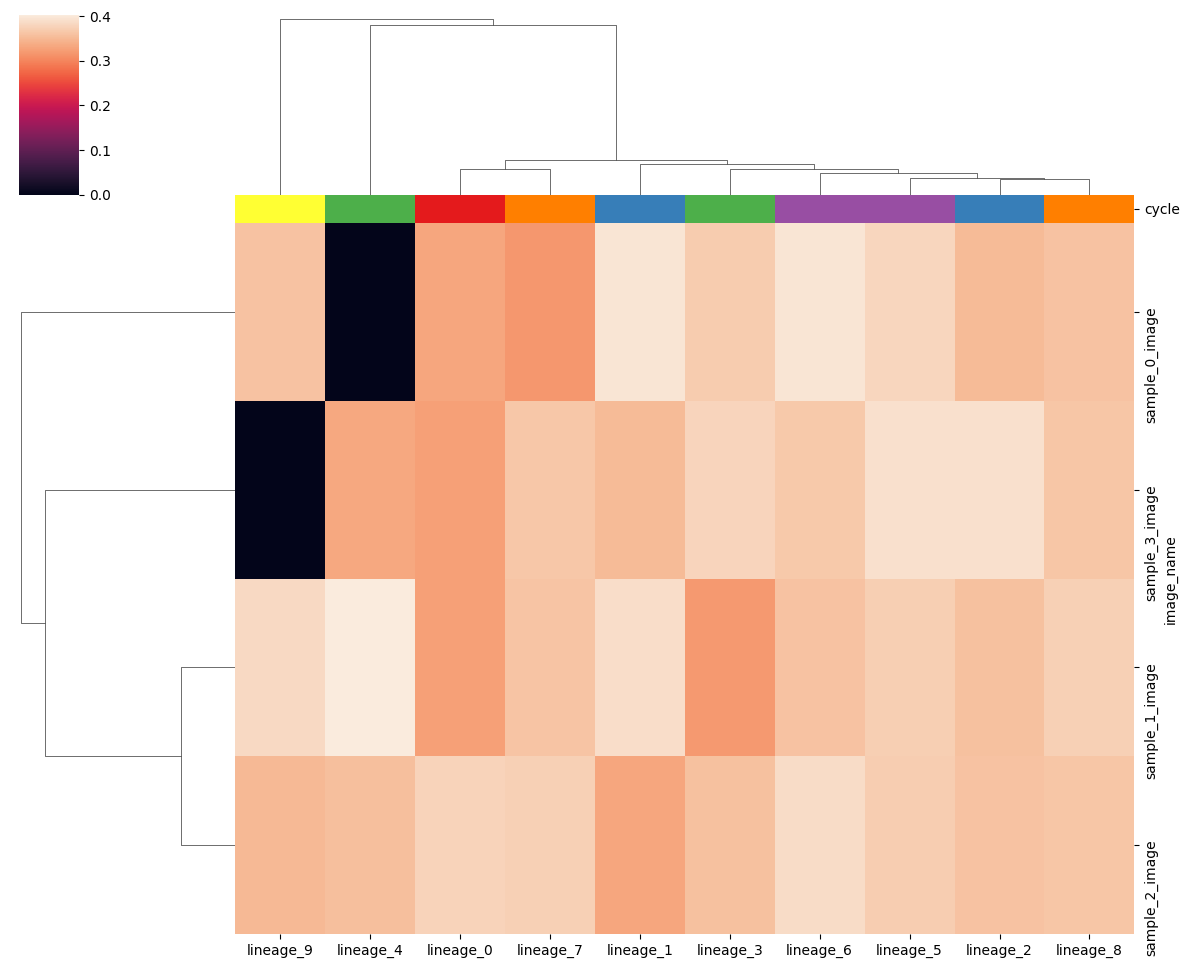

In [333]:
# sp.pl.clustermap(df_norm, row_colors=sp.pl.make_cols_colors(df_metadata), figsize=(12, 10))
sp.pl.clustermap(df_norm, col_colors=sp.pl.make_cols_colors(table.var), figsize=(12, 10))

## Segmentation level quality control


<Axes: xlabel='Percentile of covered area', ylabel='name'>

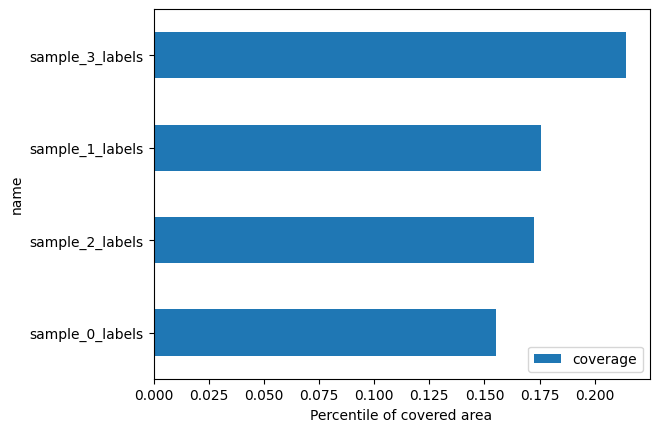

In [334]:
sp.pl.segmentation_coverage(sdata)

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_2_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_3_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'sample_0_labels', which is not present in the SpatialData obje

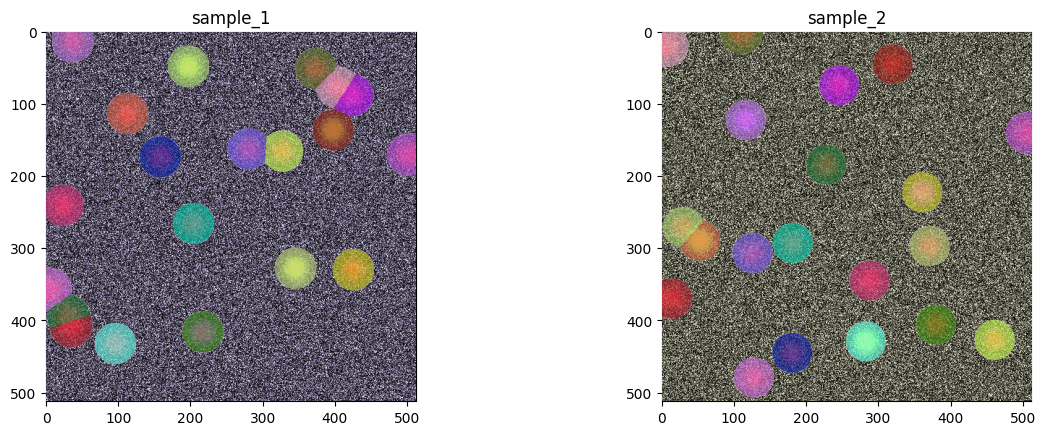

In [335]:
sdata.pl.render_images(channel=selected_markers).pl.render_labels().pl.show(
    coordinate_systems=["sample_1", "sample_2"]
)

/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_segmentation.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdata.table.obs[[area_key, sample_key]].plot.box(by=sample_key, rot=45, ax=ax)


<Axes: title={'center': 'area'}>

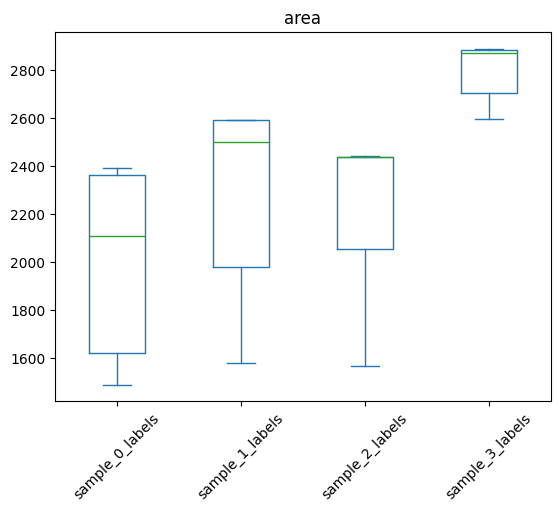

In [336]:
sp.pl.segmentation_size_boxplot(sdata, sample_key="fov_labels")

In [337]:
table.obs["area"].describe()

count      80.000000
mean     2349.425000
std       414.222095
min      1489.000000
25%      2069.000000
50%      2437.000000
75%      2593.500000
max      2890.000000
Name: area, dtype: float64

In [338]:
sp.pl.calculate_segments_per_area(sdata, sample_key="fov_labels")

/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_segmentation.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = table.groupby(sample_key).agg({sample_key: "count"})
2024-09-27 14:45:42.602 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:26 - {'sample_0_labels': 1000, 'sample_1_labels': 1000, 'sample_2_labels': 1000, 'sample_3_labels': 1000}
2024-09-27 14:45:42.606 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:29 -                  fov_labels  cells_per_mm2
fov_labels                                
sample_0_labels          20           1000
sample_1_labels          20           1000
sample_2_labels          20           1000
sample_3_labels          20           1000


fov_labels  cells_per_mm2
fov_labels                                
sample_0_labels          20           1000
sample_1_labels          20           1000
sample_2_labels          20           1000
sample_3_labels          20           1000

/Users/benjaminr/Documents/GitHub/harpy/src/sparrow/plot/_qc_segmentation.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = table.groupby(sample_key).agg({sample_key: "count"})
2024-09-27 14:45:42.804 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:26 - {'sample_0_labels': 1000, 'sample_1_labels': 1000, 'sample_2_labels': 1000, 'sample_3_labels': 1000}
2024-09-27 14:45:42.811 | DEBUG    | sparrow.plot._qc_segmentation:calculate_segments_per_area:29 -                  fov_labels  cells_per_mm2
fov_labels                                
sample_0_labels          20           1000
sample_1_labels          20           1000
sample_2_labels          20           1000
sample_3_labels          20           1000


<Axes: xlabel='fov_labels'>

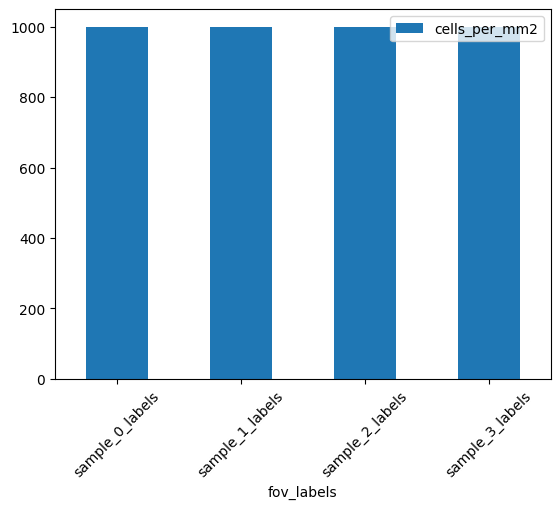

In [339]:
sp.pl.segments_per_area(sdata, sample_key="fov_labels")

## Cell level quality control


In [316]:
import numpy as np

sdata.table.layers["arcsinh"] = np.arcsinh(sdata.table.to_df())

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_52553/3156490613.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table.layers["arcsinh"] = np.arcsinh(sdata.table.to_df())


In [24]:
sdata.table

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_92941/4181403938.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sdata.table


AnnData object with n_obs × n_vars = 47859 × 40
    obs: 'Image', 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'image', 'image_width_px', 'image_height_px', 'image_num_channels', 'image_source_file', 'image_recovery_file', 'image_recovered', 'image_acquisition_id', 'image_acquisition_description', 'image_acquisition_start_x_um', 'image_acquisition_start_y_um', 'image_acquisition_end_x_um', 'image_acquisition_end_y_um', 'image_acquisition_width_um', 'image_acquisition_height_um', 'cell_id', 'region', 'sample_id', 'patient_id', 'ROI', 'indication'
    var: 'channel', 'name', 'keep', 'ilastik', 'deepcell', 'Tube Number', 'Target', 'Antibody Clone', 'Stock Concentration', 'Final Concentration / Dilution', 'uL to add'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'
    layers: 'arcsinh'

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_92941/1883182048.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  used_var_names = [x for x in sdata.table.var_names if x not in ["DNA1", "DNA2"]]
/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_92941/1883182048.py:2: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.tl.dendrogram(sdata.table, groupby="sample_id", var_names=used_var_names)
/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_92941/1883182048.py:3: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.heatmap(sdata.table, layer="arcsinh", groupby="sample_id", var_names=used_var_names, swap_axes=True, dendrogram=True, figsize=(12, 10))


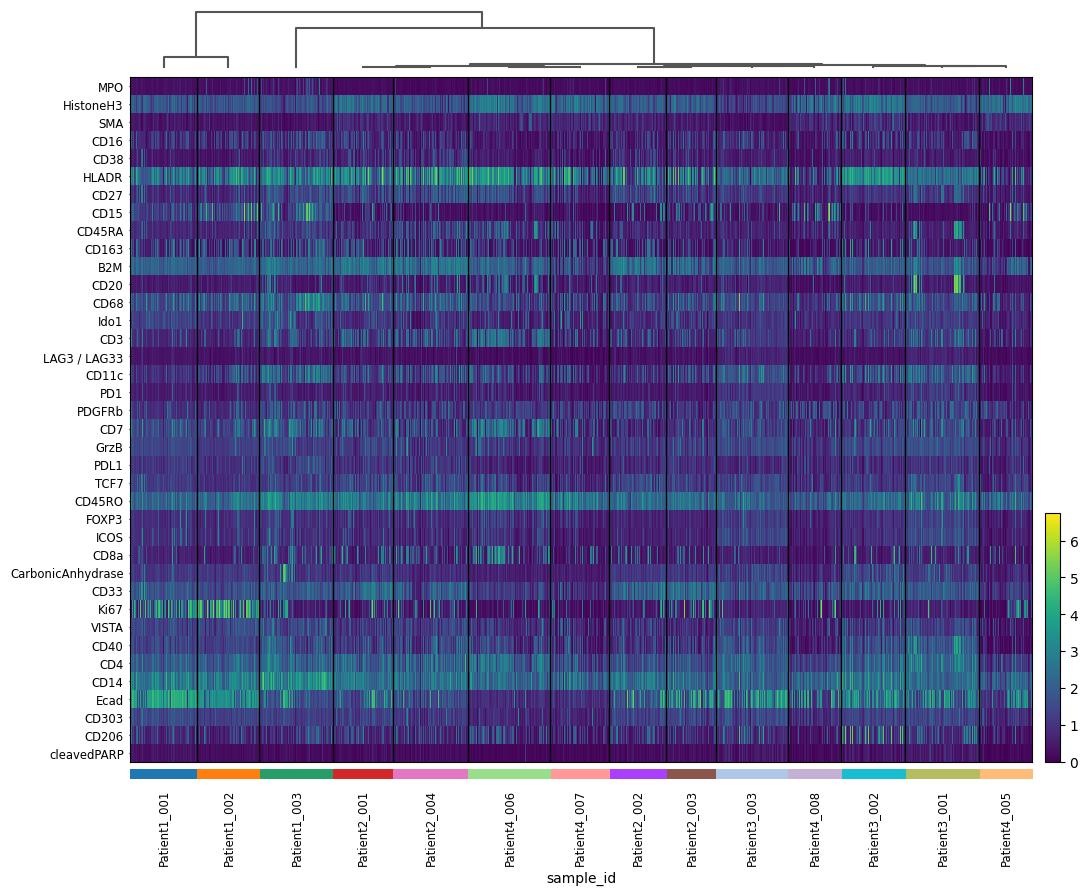

In [25]:
used_var_names = [x for x in sdata.table.var_names if x not in ["DNA1", "DNA2"]]
sc.tl.dendrogram(sdata.table, groupby="sample_id", var_names=used_var_names)
sc.pl.heatmap(
    sdata.table,
    layer="arcsinh",
    groupby="sample_id",
    var_names=used_var_names,
    swap_axes=True,
    dendrogram=True,
    figsize=(12, 10),
)

In [26]:
import seaborn as sns


def plot_ridgeplot(label_col_name, channel_col_name, data, is_save=False, save_path=""):
    """
    Plot ridgeplot
    """
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), "axes.linewidth": 2})
    palette = sns.color_palette("Set2", 12)
    g = sns.FacetGrid(data, palette=palette, row=label_col_name, hue=label_col_name, aspect=9, height=1.2)
    g.map_dataframe(sns.kdeplot, x=channel_col_name, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=channel_col_name, color="black")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, 0.2, label, color="black", fontsize=13, ha="left", va="center", transform=ax.transAxes)

    g.map(label, label_col_name)
    g.fig.subplots_adjust(hspace=-0.5)
    g.set_titles("")
    g.set(yticks=[], xlabel="mean intensity", ylabel="")
    g.despine(left=True)
    plt.suptitle(f"{channel_col_name}", y=0.98)
    if is_save:
        plt.savefig(save_path + f"/rp_{channel_col_name}.png")
    plt.show()

In [27]:
adata = sc.pp.subsample(sdata.table, fraction=0.1, copy=True)
adata

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_92941/135476782.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  adata = sc.pp.subsample(sdata.table, fraction=0.1, copy=True)


AnnData object with n_obs × n_vars = 4785 × 40
    obs: 'Image', 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'image', 'image_width_px', 'image_height_px', 'image_num_channels', 'image_source_file', 'image_recovery_file', 'image_recovered', 'image_acquisition_id', 'image_acquisition_description', 'image_acquisition_start_x_um', 'image_acquisition_start_y_um', 'image_acquisition_end_x_um', 'image_acquisition_end_y_um', 'image_acquisition_width_um', 'image_acquisition_height_um', 'cell_id', 'region', 'sample_id', 'patient_id', 'ROI', 'indication'
    var: 'channel', 'name', 'keep', 'ilastik', 'deepcell', 'Tube Number', 'Target', 'Antibody Clone', 'Stock Concentration', 'Final Concentration / Dilution', 'uL to add'
    uns: 'spatialdata_attrs', 'dendrogram_sample_id', 'sample_id_colors'
    obsm: 'spatial'
    layers: 'arcsinh'

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or

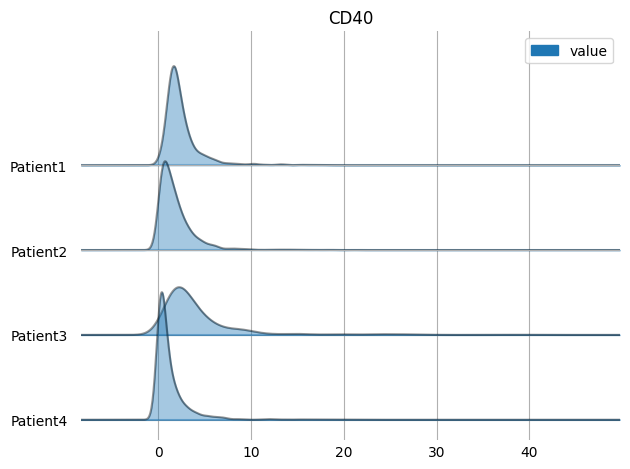

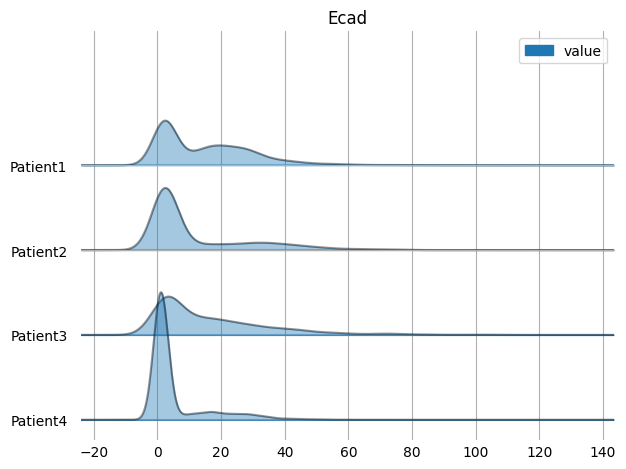

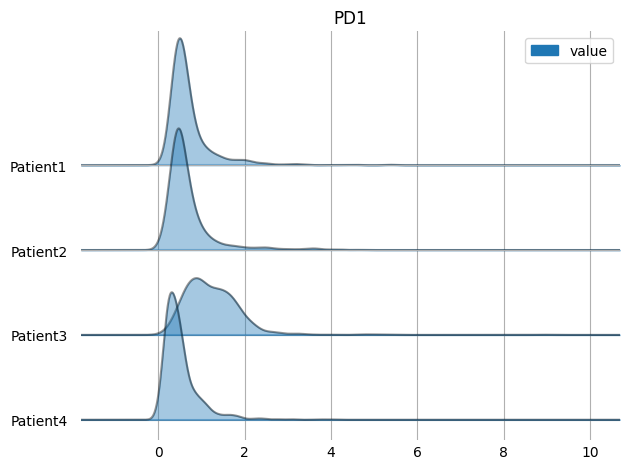

In [95]:
sp.pl.ridgeplot_channel_sample(adata, y="patient_id", value_vars=["Ecad", "CD40", "PD1"])

In [36]:
sc.pp.neighbors(sdata.table, n_neighbors=10, random_state=42)

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/418917352.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pp.neighbors(sdata.table, n_neighbors=10)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
sc.tl.umap(sdata.table, random_state=42)

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/1677724947.py:1: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.tl.umap(sdata.table, min_dist=0.2, random_state=42)


/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/2401644581.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.umap(sdata.table, color=c, ax=axs, show=False)
/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/2401644581.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.umap(sdata.table, color=c, ax=axs, show=False)
/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/2401644581.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.umap(sdata.table, color=c, ax=axs, show=False)


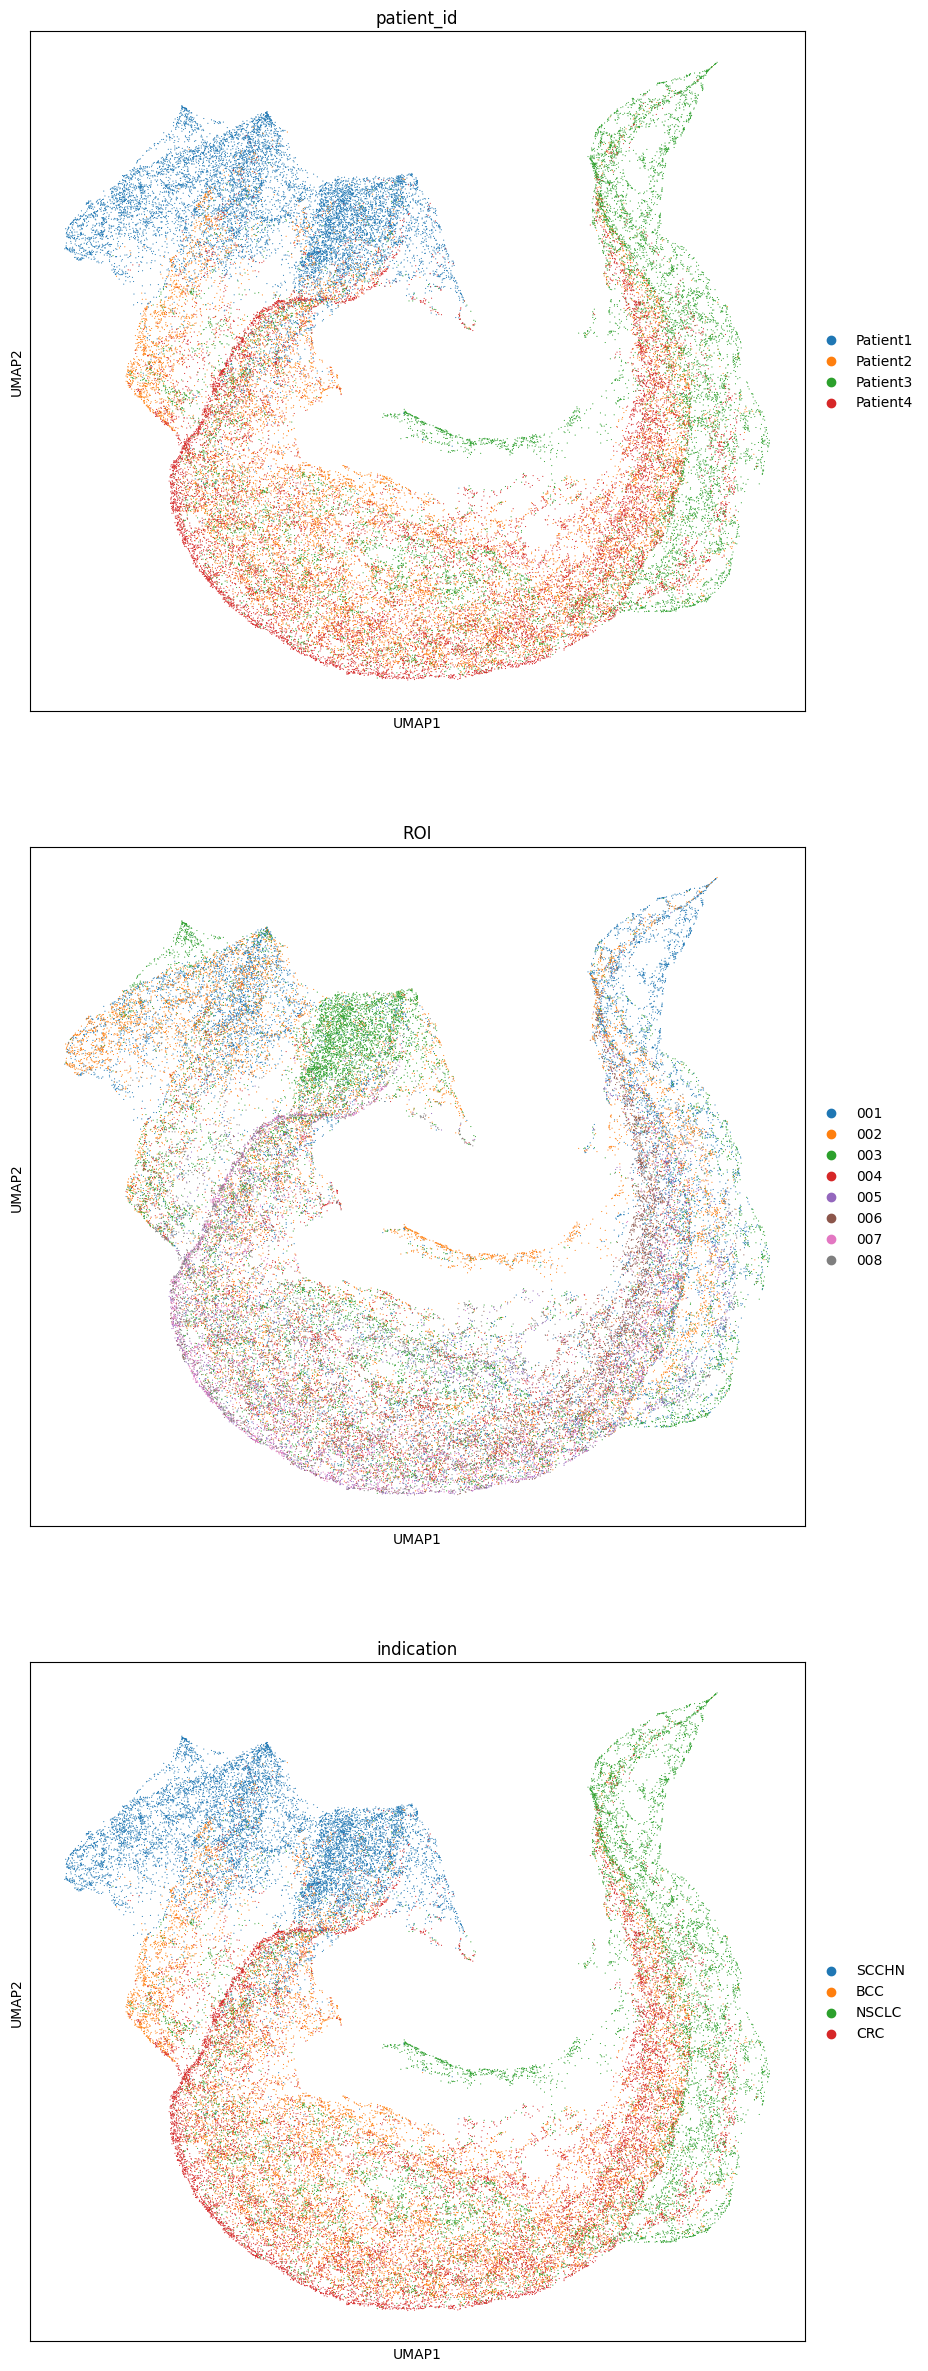

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))
markers = ["patient_id", "ROI", "indication"]
for c, axs in zip(markers, axes):
    sc.pl.umap(sdata.table, color=c, ax=axs, show=False)

/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/2204917557.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.umap(sdata.table, color=c, ax=axs, show=False)
/var/folders/_7/w0gk4q1n3sl8pmknc_rwb39h0000gp/T/ipykernel_2829/2204917557.py:4: DeprecationWarning: Table accessor will be deprecated with SpatialData version 0.1, use sdata.tables instead.
  sc.pl.umap(sdata.table, color=c, ax=axs, show=False)


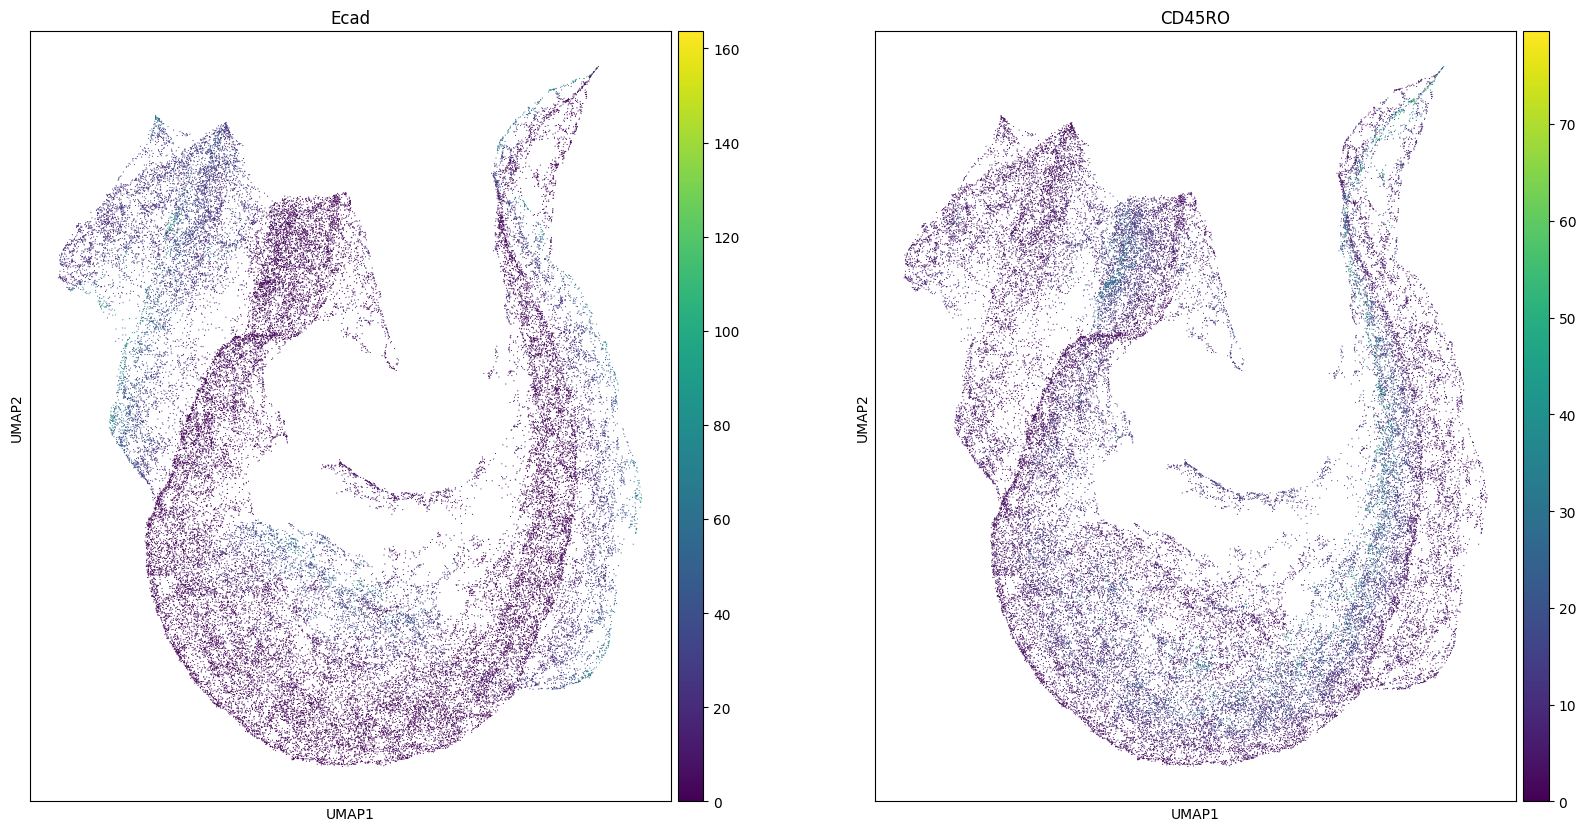

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
markers = ["Ecad", "CD45RO"]
for c, axs in zip(markers, axes):
    sc.pl.umap(sdata.table, color=c, ax=axs, show=False)